In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import ResNet101V2
from tensorflow.keras.models import Model
import os

In [ ]:
import os
import shutil
from sklearn.model_selection import train_test_split

dataset_dir = 'VAR'
output_dir = 'splitted_dataset'
classes = os.listdir(dataset_dir)

for folder in ['train', 'val', 'test']:
    for class_name in classes:
        os.makedirs(os.path.join(output_dir, folder, class_name), exist_ok=True)

for class_name in classes:
    class_path = os.path.join(dataset_dir, class_name)
    images = os.listdir(class_path)

    # 90% train, 10% sisa (test+val)
    train, test_val = train_test_split(images, test_size=0.10, random_state=42)
    # Bagi sisa jadi 50:50 → 5% val, 5% test
    val, test = train_test_split(test_val, test_size=0.5, random_state=42)

    for img in train:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, 'train', class_name))
    for img in val:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, 'val', class_name))
    for img in test:
        shutil.copy(os.path.join(class_path, img), os.path.join(output_dir, 'test', class_name))

print("✅ Dataset berhasil di-split ke folder 'splitted_dataset': 90% Train, 5% Validation, 5% Test!")


In [2]:
#**Path dataset**
base_dir = "splitted_dataset"
train_path = os.path.join(base_dir, "train")
val_path = os.path.join(base_dir, "val")
test_path = os.path.join(base_dir, "test")

In [3]:
# **Augmentasi Data**
train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=10,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.4, 1.5],
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)

val_test_datagen = ImageDataGenerator(rescale=1.0/255)

In [4]:
# **Load dataset dengan augmentasi**
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)

val_generator = val_test_datagen.flow_from_directory(
    val_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical"
)

test_generator = val_test_datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode="categorical",
    shuffle=False
)

Found 1802 images belonging to 5 classes.
Found 100 images belonging to 5 classes.
Found 102 images belonging to 5 classes.


In [5]:

base_model = ResNet101V2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False 

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dense(5, activation='softmax')  
])

In [6]:
# **Compile Model**
model.compile(
    loss='categorical_crossentropy',
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

In [7]:
# **Training Model**
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    epochs=25,
    validation_data=val_generator,
    validation_steps=len(val_generator),
)

Epoch 1/25


57/57 [==============================] - 229s 4s/step - loss: 1.0049 - accuracy: 0.5943 - val_loss: 0.6912 - val_accuracy: 0.7100
Epoch 2/25
57/57 [==============================] - 224s 4s/step - loss: 0.6685 - accuracy: 0.7236 - val_loss: 0.6549 - val_accuracy: 0.7000
Epoch 3/25
57/57 [==============================] - 223s 4s/step - loss: 0.5781 - accuracy: 0.7564 - val_loss: 0.6140 - val_accuracy: 0.6900
Epoch 4/25
57/57 [==============================] - 218s 4s/step - loss: 0.5399 - accuracy: 0.7819 - val_loss: 0.5039 - val_accuracy: 0.8200
Epoch 5/25
57/57 [==============================] - 213s 4s/step - loss: 0.4757 - accuracy: 0.8102 - val_loss: 0.6158 - val_accuracy: 0.6800
Epoch 6/25
57/57 [==============================] - 208s 4s/step - loss: 0.4447 - accuracy: 0.8174 - val_loss: 0.6897 - val_accuracy: 0.7200
Epoch 7/25
57/57 [==============================] - 198s 3s/step - loss: 0.4485 - accuracy: 0.8130 - val_loss: 0.5427 - val_accuracy: 0.7800
Epoch 8/25


In [8]:
# **Evaluasi Model**
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

4/4 [==============================] - 12s 2s/step - loss: 0.3508 - accuracy: 0.8431
Test Accuracy: 84.31%


In [9]:
# **Simpan Model**
model.save("fould-classification-resnet101v2.keras")
model.save("fould-classification-resnet101v2.h5")

c:\Users\Ilham\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [10]:
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

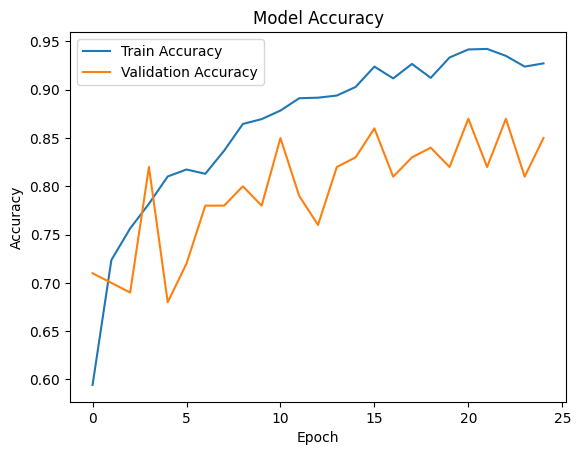

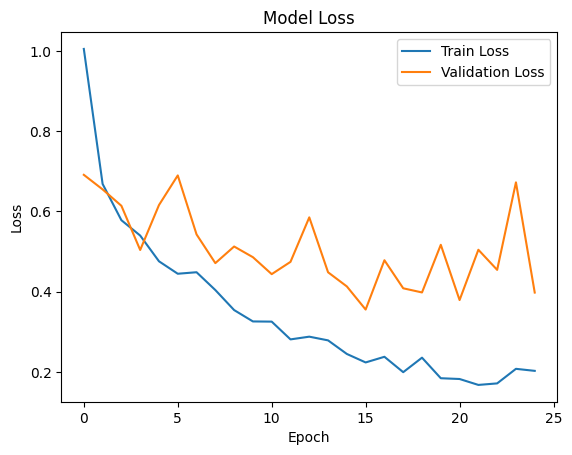

In [11]:
# Plot Akurasi
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

4/4 [==============================] - 13s 3s/step


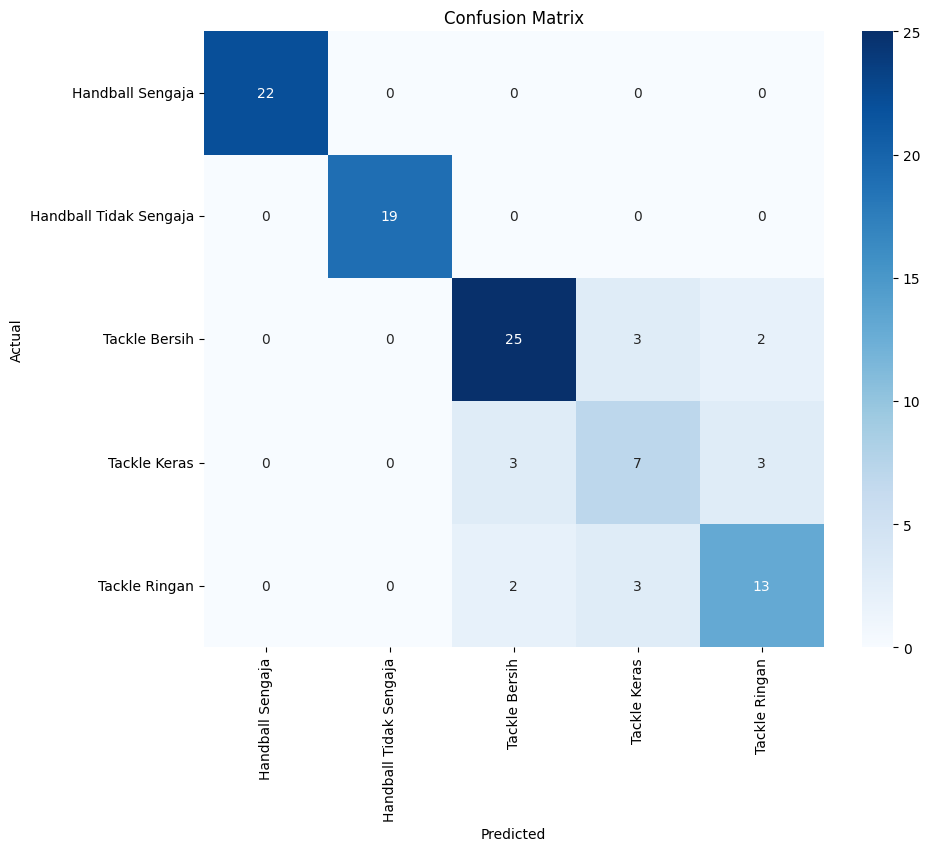


Classification Report:
                        precision    recall  f1-score   support

      Handball Sengaja       1.00      1.00      1.00        22
Handball Tidak Sengaja       1.00      1.00      1.00        19
         Tackle Bersih       0.83      0.83      0.83        30
          Tackle Keras       0.54      0.54      0.54        13
         Tackle Ringan       0.72      0.72      0.72        18

              accuracy                           0.84       102
             macro avg       0.82      0.82      0.82       102
          weighted avg       0.84      0.84      0.84       102



In [12]:
import numpy as np

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("\nClassification Report:")
print(classification_report(true_classes, y_pred, target_names=class_labels))

1/1 [==============================] - 2s 2s/step


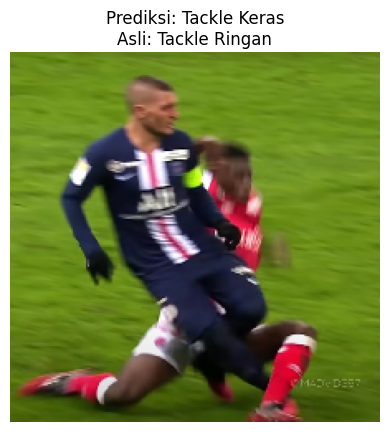

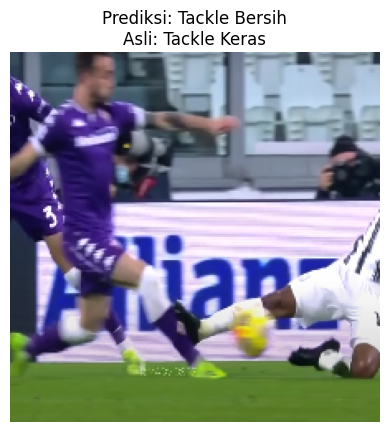

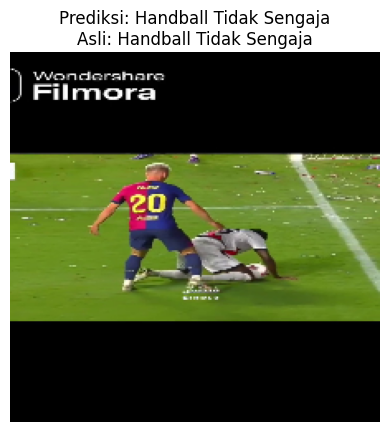

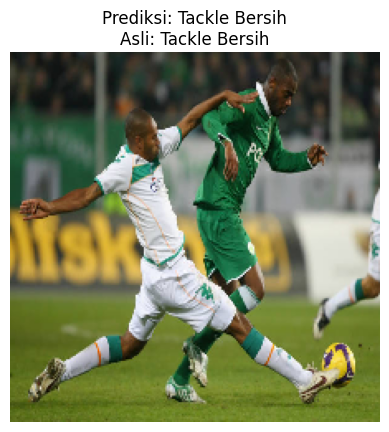

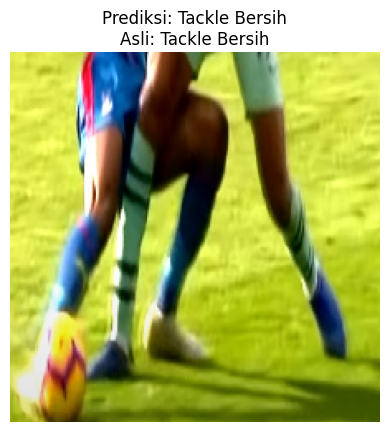

In [13]:
import random

sample_indices = random.sample(range(len(test_generator.filenames)), 5)
sample_files = [test_generator.filenames[i] for i in sample_indices]
sample_images, sample_labels = [], []

for _ in range(len(test_generator)):
    img_batch, label_batch = next(test_generator)
    for img, label in zip(img_batch, label_batch):
        sample_images.append(img)
        sample_labels.append(label)

sample_images = [sample_images[i] for i in sample_indices]
sample_labels = [sample_labels[i] for i in sample_indices]

sample_images = np.array(sample_images)
predictions = model.predict(sample_images)
predicted_classes = np.argmax(predictions, axis=1)

for i, img in enumerate(sample_images):
    plt.imshow(img)
    plt.title(f"Prediksi: {class_labels[predicted_classes[i]]}\nAsli: {class_labels[np.argmax(sample_labels[i])]}")
    plt.axis('off')
    plt.show()


4/4 [==============================] - 11s 3s/step


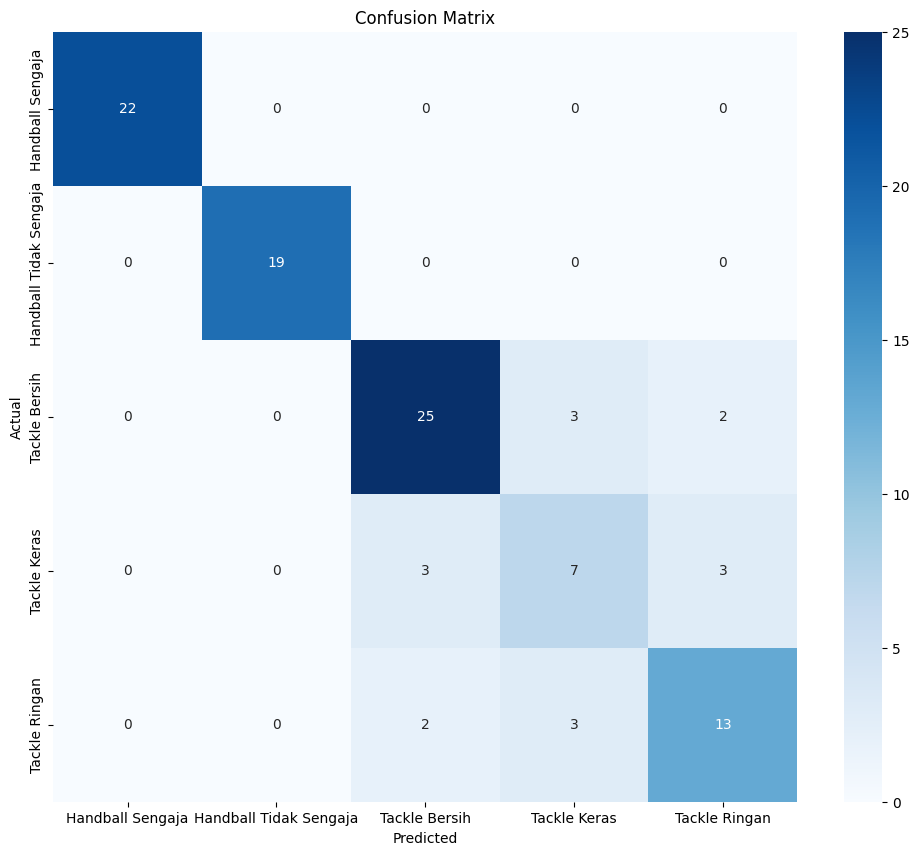

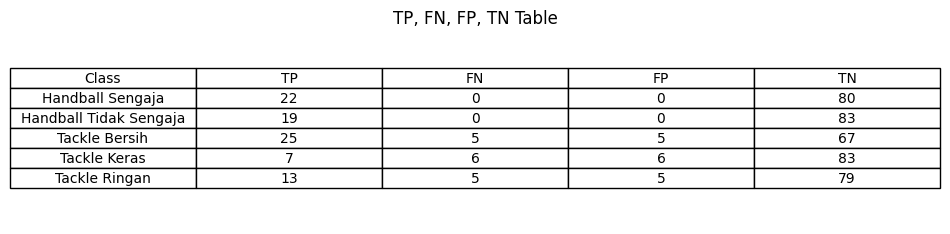


TP, FN, FP, TN for each class:
Handball Sengaja: TP=22, FN=0, FP=0, TN=80
Handball Tidak Sengaja: TP=19, FN=0, FP=0, TN=83
Tackle Bersih: TP=25, FN=5, FP=5, TN=67
Tackle Keras: TP=7, FN=6, FP=6, TN=83
Tackle Ringan: TP=13, FN=5, FP=5, TN=79


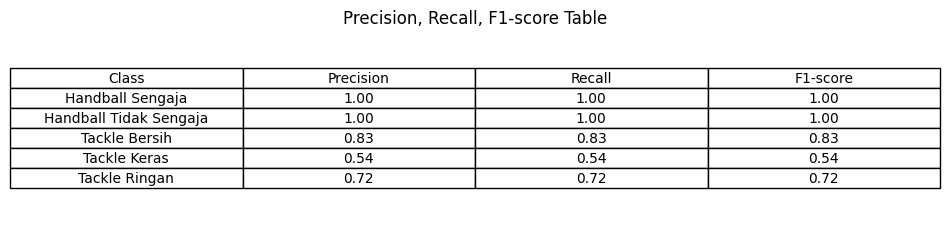


Classification Report (Sklearn):
                        precision    recall  f1-score   support

      Handball Sengaja       1.00      1.00      1.00        22
Handball Tidak Sengaja       1.00      1.00      1.00        19
         Tackle Bersih       0.83      0.83      0.83        30
          Tackle Keras       0.54      0.54      0.54        13
         Tackle Ringan       0.72      0.72      0.72        18

              accuracy                           0.84       102
             macro avg       0.82      0.82      0.82       102
          weighted avg       0.84      0.84      0.84       102



In [14]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, precision_score, recall_score, f1_score

Y_pred = model.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

conf_matrix = confusion_matrix(true_classes, y_pred)
plt.figure(figsize=(12, 10))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

num_classes = len(class_labels)
total_samples = np.sum(conf_matrix)

TP_list, FN_list, FP_list, TN_list = [], [], [], []

for i in range(num_classes):
    TP = conf_matrix[i, i]  
    FN = np.sum(conf_matrix[i, :]) - TP  
    FP = np.sum(conf_matrix[:, i]) - TP 
    TN = total_samples - (TP + FP + FN)  

    TP_list.append(TP)
    FN_list.append(FN)
    FP_list.append(FP)
    TN_list.append(TN)

fig, ax = plt.subplots(figsize=(10, num_classes * 0.5))
ax.axis('tight')
ax.axis('off')
table_data = [['Class', 'TP', 'FN', 'FP', 'TN']] + [[class_labels[i], TP_list[i], FN_list[i], FP_list[i], TN_list[i]] for i in range(num_classes)]
table = ax.table(cellText=table_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('TP, FN, FP, TN Table')
plt.show()

print("\nTP, FN, FP, TN for each class:")
for i in range(num_classes):
    print(f"{class_labels[i]}: TP={TP_list[i]}, FN={FN_list[i]}, FP={FP_list[i]}, TN={TN_list[i]}")


precision_list = [TP / (TP + FP) if (TP + FP) != 0 else 0 for TP, FP in zip(TP_list, FP_list)]
recall_list = [TP / (TP + FN) if (TP + FN) != 0 else 0 for TP, FN in zip(TP_list, FN_list)]
f1_score_list = [2 * (p * r) / (p + r) if (p + r) != 0 else 0 for p, r in zip(precision_list, recall_list)]

fig, ax = plt.subplots(figsize=(10, num_classes * 0.5))
ax.axis('tight')
ax.axis('off')
metrics_data = [['Class', 'Precision', 'Recall', 'F1-score']] + [[class_labels[i], f"{precision_list[i]:.2f}", f"{recall_list[i]:.2f}", f"{f1_score_list[i]:.2f}"] for i in range(num_classes)]
table = ax.table(cellText=metrics_data, cellLoc='center', loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.title('Precision, Recall, F1-score Table')
plt.show()

print("\nClassification Report (Sklearn):")
print(classification_report(true_classes, y_pred, target_names=class_labels))
